In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
class Neuron:
    def __init__(self, n_inputs, n_outputs, activation="relu"): 
        """Initializes a single neuron with random weights and a bias."""
        self.weights = np.random.randn(n_inputs, n_outputs) 
        self.bias = np.zeros((1, n_outputs))
        self.activation = activation
    
    def activate(self, z):
        """Applies activation function."""
        if self.activation == "relu":
            return np.maximum(0, z)
        elif self.activation == "sigmoid":
            return 1 / (1 + np.exp(-z))
        elif self.activation == "tanh":
            return np.tanh(z)
        elif self.activation == "linear":
            return z
        else:
            raise ValueError("Unsupported activation function")
    
    def activation_derivative(self, z):
        """Computes derivative of activation function."""
        if self.activation == "relu":
            return (z > 0).astype(float)
        elif self.activation == "sigmoid":
            return self.activate(z) * (1 - self.activate(z))
        elif self.activation == "tanh":
            return 1 - self.activate(z) ** 2
        elif self.activation == "linear":
            return 1 
        else:
            raise ValueError("Unsupported activation function")
    
    def forward(self, X):
        """Computes forward pass for the neuron."""
        self.Z = np.dot(X, self.weights) + self.bias
        self.A = self.activate(self.Z)
        return self.A
    
    def backward(self, dl_dA, X, learning_rate=0.01):
        """Computes backward pass and updates weights."""
        dl_dZ = dl_dA * self.activation_derivative(self.Z) ##dl/dZ = dl/dA * dA/dZ Chain rule
        dl_dW = np.dot(X.T, dl_dZ) / X.shape[0] ##dl/dW = dl/dZ * dZ/dW Chain rule
        dl_db = np.sum(dl_dZ, axis=0, keepdims=True) / X.shape[0]
        
        self.weights -= learning_rate * dl_dW ## 
        self.bias -= learning_rate * dl_db
        return                              ####np.dot(dZ, self.weights.T)

In [3]:
# Example usage
np.random.seed(42)
n_samples= 100
n_features = 3
### X --> Input data
X = np.random.randn(n_samples, n_features)  # 100 samples,3 features each

### Y --> Target output

## Binary labels
#Y = np.random.randint(0, 2, (n_samples, 1)) 

## Random Real numbers between -1 and 1
#Y = np.random.randn(n_samples,1)
#Y = Y/np.max(Y)

## Linearly dependent on the 3 feautures of X, with a normalized range of (-1,1)
Y = (3*X[:,0] + 2*X[:,1] - 4*X[:,2]).reshape(n_samples, 1)
Y = Y/np.max(Y)

## Initialize a Neuron
N = Neuron(n_features,1,activation='linear')  ### 3 input neuron = no. of features, 1 output neuron

num_iterations=1000
learning_rate= 0.1

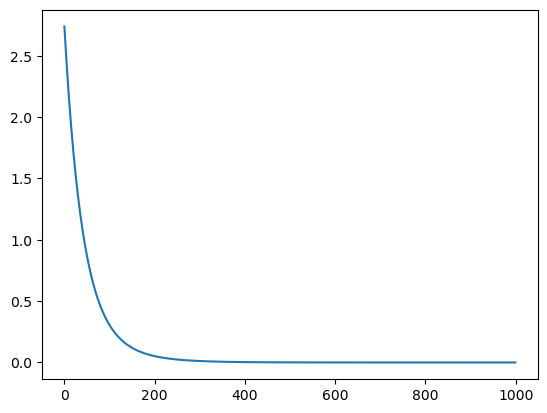

In [4]:
## Train model
iter=[]
loss_time=[]
A_time = []
for i in range(num_iterations):
    A = N.forward(X)  ## A is predicted Y
    
    ##Binary cross entropy loss when we are solving a binary classification problem. 
    #loss = -np.mean(Y * np.log(A + 1e-8) + (1 - Y) * np.log(1 - A + 1e-8))
    #dl_dA = -(Y /(A + 1e-8)) + ((1 - Y) / (1 - A + 1e-8))
    
    # Mean squared loss for a fitting problem
    loss = np.mean((A-Y)**2)
    dl_dA = A-Y
    
    N.backward(dl_dA,X)
    loss_time.append(loss)
    iter.append(i)
    A_time.append(A)

plt.plot(iter,loss_time)

(-1.0, 1.0)

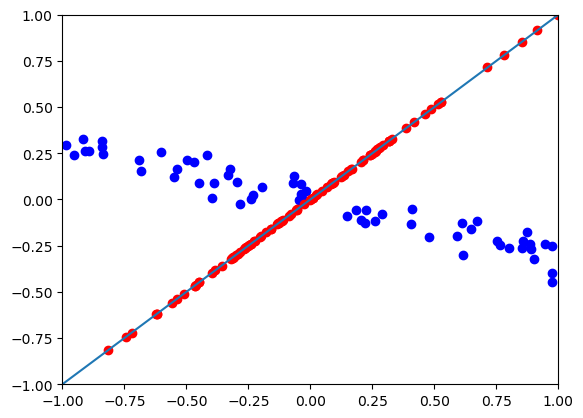

In [5]:
x_dum = np.linspace(-2,2)
plt.plot(A_time[0],Y,'ob') ##Initial Y_pred vs Y
plt.plot(A,Y,'or') ## Y_Pred after training
plt.plot(x_dum,x_dum) ### y=X line
plt.xlim([-1,1])
plt.ylim([-1,1])